<a href="https://colab.research.google.com/github/SeyfGoumeida/Projet_Mixt_Coclus_Partie1/blob/main/Projet_Mixt_Coclus_Partie1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install gensim

In [46]:
import pandas as pd
import string
import re
import operator
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
#------------------------------------------------ 
import os
from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import string
import re
import operator
from functools import reduce
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from collections import Counter
from gensim.utils import tokenize
from gensim.models import Word2Vec

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
df = pd.read_csv('/content/classic4.csv',header=0,index_col=0)
df


,text,label
0,Computer-Aided Analysis and Design of Informat...,cacm
1,Milestones in Cataloging In the case of the pr...,cisi
2,childhood psychosis. a description is given of...,med
3,neonatal hepatitis or familial neonatal obstru...,med
4,Handbook of Comparative Librarianship The firs...,cisi
...,...,...
7090,throat and nose surgery in patients with const...,med
7091,Computers and Society: A Proposed Course for C...,cacm
7092,Romberg Integration (Algorithm 60),cacm
7093,Semantic Evaluation from Left to Right This pa...,cacm


In [48]:
df["label"].value_counts().to_frame()

,label
cacm,3204
cisi,1460
cran,1398
med,1033


In [49]:
#punctuations
punctuations = string.punctuation
#stopwords
stop_words = list(STOP_WORDS)
def clean_text(
  string : str,
  ponctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~',
  stop_words = stop_words)->str : 

  #URLs
  string = re.sub(r"https?://\S+|www\.\S+",'',string)
  #html 
  string = re.sub(r'<.*?>','',string)
  #Numbers
  string = re.sub(r'[0-9]+','',string) 

  #Remove punctuations
  for x in string.lower():
    if x in punctuations:
      string = string.replace(x,"")
  #To lower
  string = string.lower()
  #Remove stop words
  lemmatizer = WordNetLemmatizer()
  string = ' '.join([lemmatizer.lemmatize(word) for word in string.split() if word not in stop_words])
  #Cleaning the whitespaces
  string = re.sub(r'\s', ' ', string).strip()

  return string

In [50]:
abstract = df['text'].to_list()
abstracts_cleaned = [clean_text(x) for x in abstract]

In [51]:
len(abstracts_cleaned)

7095

#Word2Vec

In [52]:
from gensim.utils import tokenize
sentances = [list(tokenize(s, deacc=True, lower=True)) for s in abstracts_cleaned]
len(sentances)

7095

In [53]:
from gensim.models import word2vec
model1 = word2vec.Word2Vec(sentances,min_count=2)
model1.corpus_count
vocab = model1.wv.vocab
words = list(vocab) # les mots

list_vec = list(model1.wv.vectors) # les vecteurs de mots

model1.similarity('worker', 'treated') # calcul de similarité

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':


0.68559164

In [54]:
len(list(model1.wv.vocab.keys()))

13643

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'au

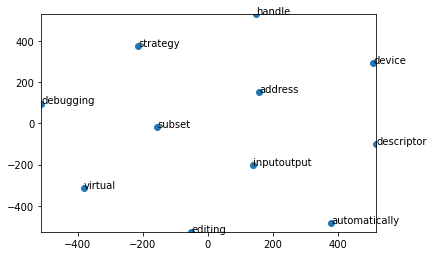

In [55]:
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, word, size):
    
  arr = np.empty((0,size), dtype='f')
  word_labels = [word]
    
  close_words = model.similar_by_word(word)

  arr = np.append(arr, np.array([model[word]]), axis=0)
  for wrd_score in close_words:
    wrd_vector = model[wrd_score[0]]
    word_labels.append(wrd_score[0])
    arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
  tsne = TSNE(n_components=2, random_state=0)
  np.set_printoptions(suppress=True)
  Y = tsne.fit_transform(arr)
  x_coords = Y[:, 0]
  y_coords = Y[:, 1]
  plt.scatter(x_coords, y_coords)
  for label, x, y in zip(word_labels, x_coords, y_coords):
      plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
  plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
  plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
  plt.show()

display_closestwords_tsnescatterplot(model1, 'address', 100)

In [20]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gzip -d GoogleNews-vectors-negative300.bin.gz

In [26]:
from gensim.models import KeyedVectors

model_2 = Word2Vec(size=300, min_count=1)
model_2.build_vocab(sentances)
total_examples = model_2.corpus_count
model = KeyedVectors.load_word2vec_format("/content/GoogleNews-vectors-negative300.bin", binary=True,limit=500000)
model_2.build_vocab([list(model.vocab.keys())], update=True)
model_2.intersect_word2vec_format("/content/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
model_2.train(sentances, total_examples=total_examples, epochs=model_2.iter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if __name__ == '__main__':


(2018900, 2018900)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


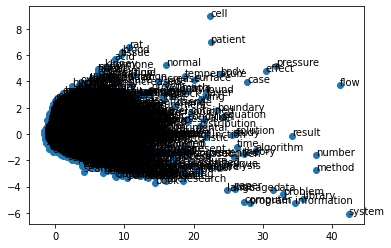

In [36]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
# fit a 2d PCA model to the vectors
X = model_2[model1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'au

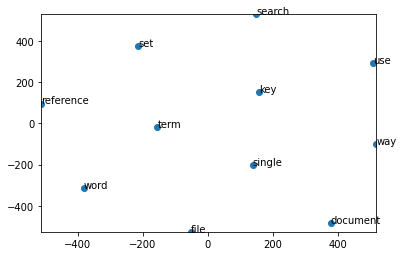

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'au

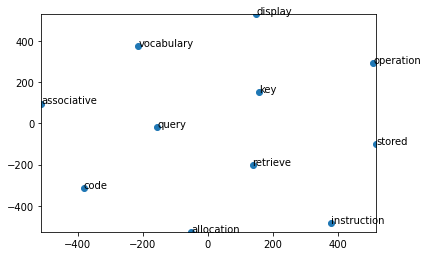

In [44]:
display_closestwords_tsnescatterplot(model_2, 'key', 300)
display_closestwords_tsnescatterplot(model1, 'key', 100)